In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("C:\\Users\\adars\\Downloads\\train-chennai-sale.csv")

In [3]:
df.shape


(7109, 22)

In [4]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

# PRT_ID

In [6]:
df.PRT_ID.isnull().sum()

0

In [7]:
len(df['PRT_ID'].unique()) #all unique values

7109

In [8]:
df.drop(columns='PRT_ID',inplace=True) #Deleted the column as it is not necessary for model building

# AREA

In [9]:
df['AREA'].isnull().sum() #no null values

0

In [10]:
df['AREA'].value_counts() #noticed lot of spelling mistakes and corrected them using replace method

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chormpet         6
Chrmpet          6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [11]:
df['AREA']= df['AREA'].replace(to_replace=['Chrompt','Chrmpet','Chormpet'],value='Chrompet')

In [12]:
df['AREA']= df['AREA'].replace(to_replace='Karapakam',value='Karapakkam')

In [13]:
df['AREA']= df['AREA'].replace(to_replace='KKNagar',value='KK Nagar')

In [14]:


df['AREA']= df['AREA'].replace(to_replace='Velchery',value='Velachery')

In [15]:

df['AREA']= df['AREA'].replace(to_replace=['Ana Nagar','Ann Nagar'],value='Anna Nagar')

In [16]:
df['AREA']= df['AREA'].replace(to_replace='Adyr',value='Adyar')

In [17]:
df['AREA']= df['AREA'].replace(to_replace='TNagar',value='T Nagar')

In [18]:

df['AREA']=df['AREA'].astype("category") #converting object to category

# INT_SQFT

In [19]:
df['INT_SQFT'].isnull().sum() #no null values

0

In [20]:

df['INT_SQFT'].describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [21]:
q3= 1744
q1= 993
iqr= q3-q1
iqr



751

In [22]:
o1 = q1-1.5*iqr
o2 = q3+1.5*iqr
o1

-133.5

In [23]:
o2   #there are no outliers in int_sqft

2870.5

# DATE_SALE

In [24]:
df['DATE_SALE'].values[0]

'04-05-2011'

In [25]:
df['DATE_SALE'].isnull().sum()  #no null values

0

In [26]:
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE']) #converting string to Datetime

# DIST_MAINROAD

In [27]:
df['DIST_MAINROAD'].values[0]

131

In [28]:
df['DIST_MAINROAD'].isnull().sum() #no null values

0

In [29]:
df['DIST_MAINROAD'].describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

In [30]:
q3= 148
q1= 50
iqr= q3-q1


iqr

98

In [31]:
o1 = q1-1.5*iqr
o2 = q3+1.5*iqr
o1

-97.0

In [32]:
o2 #no outliers in our DIST_MAINROAD column

295.0

# N_BEDROOM

In [33]:
df['N_BEDROOM'].values[0]

1.0

In [34]:
df['N_BEDROOM'].isnull().sum()

1

In [35]:
df['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [36]:
df[df['N_BEDROOM'].isnull()]  
#checking row with no bed room

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
4060,Anna Nagar,1556,2013-01-16,181,NaN,1.0,4,Partiall,No,23-01-1986,...,NoSewr,No Access,RM,4.8,2.7,2.0,3.155,313136,107978,10797790


In [37]:
df[df['N_ROOM']==4]['N_BEDROOM'].value_counts() #checking all the rows with 4 bedrooms

2.0    1813
1.0     749
Name: N_BEDROOM, dtype: int64

In [38]:
df.shape

(7109, 21)

In [39]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [40]:
df['N_BEDROOM']=df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0])

In [41]:
df['N_BEDROOM'].isnull().sum()

0

In [42]:
df['N_BEDROOM']=df['N_BEDROOM'].astype('category')

# N_BATHROOM	

In [43]:
df['N_BATHROOM'].values[0]

1.0

In [44]:
df['N_BATHROOM'].isnull().sum()

5

In [45]:
df[df['N_BATHROOM'].isnull()]

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
70,Anna Nagar,1589,2010-03-22,39,1.0,NaN,4,Partial,No,02-04-1966,...,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,451857,85486,12212350
5087,Chrompet,1016,2012-02-08,105,1.0,NaN,3,AbNormal,Yes,10-08-1980,...,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,330086,106479,10647920
6134,Chrompet,916,2012-02-08,173,1.0,NaN,3,Normal Sale,Yes,12-08-1974,...,ELO,Paved,RL,3.4,3.5,3.0,NaN,265423,44237,8847420
6371,Chrompet,1035,2012-06-11,90,1.0,NaN,3,Partial,No,14-11-1981,...,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,223403,24823,8274200
6535,Anna Nagar,1864,2007-05-03,184,2.0,NaN,5,Family,Yes,07-03-1997,...,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,575606,124455,15556920


In [46]:
df['N_BATHROOM'].value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [47]:
df['N_BATHROOM']=df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0])

In [48]:
df['N_BATHROOM']=df['N_BATHROOM'].astype('category')

In [49]:
df.shape

(7109, 21)

# N_ROOM

In [50]:
df['N_ROOM'].isnull().sum()  #no null vales

0

In [51]:
df['N_ROOM'].describe()


count    7109.000000
mean        3.688704
std         1.019099
min         2.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: N_ROOM, dtype: float64

In [52]:
df['N_ROOM']=df['N_ROOM'].astype('category')

# SALE_COND

In [53]:
df['SALE_COND'].values[0]

'AbNormal'

In [54]:
df['SALE_COND'].isnull().sum() #no null values

0

In [55]:
df['SALE_COND'].value_counts()   #found spelling mistakes


AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [56]:
df['SALE_COND']=df['SALE_COND'].replace(to_replace='Adj Land',value='AdjLand')

In [57]:
df['SALE_COND']=df['SALE_COND'].replace(to_replace=['Partiall','PartiaLl'],value='Partial')

In [58]:
df['SALE_COND']=df['SALE_COND'].replace(to_replace='Ab Normal',value='AbNormal')

In [59]:
df['SALE_COND']=df['SALE_COND'].astype("category")

# PARK_FACIL

In [60]:
df['PARK_FACIL'].isnull().sum()


0

In [61]:
df['PARK_FACIL'].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [62]:
df['PARK_FACIL']=df['PARK_FACIL'].replace("Noo",'No')

In [63]:
df['PARK_FACIL'].value_counts()


Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [64]:
df['PARK_FACIL']=df['PARK_FACIL'].map({'Yes':1,'No':0})

In [65]:
df['PARK_FACIL']=df['PARK_FACIL'].astype("bool")

In [66]:
df['PARK_FACIL']=df['PARK_FACIL'].map({True:1,False:0})

# DATE_BUILD

In [67]:
df['DATE_BUILD'].values[0]

'15-05-1967'

In [68]:
df['DATE_BUILD'].isnull().sum()

0

In [69]:
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD']) #converting string to Datetime

In [70]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,1,1967-05-15,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,0,1995-12-22,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,1,1992-09-02,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,0,1988-03-18,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,1,1979-10-13,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


# BUILDTYPE



In [71]:
df['BUILDTYPE'].values[0]

'Commercial'

In [72]:
df['BUILDTYPE'].isnull().sum()

0

In [73]:
df['BUILDTYPE'].value_counts()  #correct the spelling mistakes

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [74]:
df['BUILDTYPE']= df['BUILDTYPE'].replace("Comercial",'Commercial')

In [75]:
df['BUILDTYPE']= df['BUILDTYPE'].replace("Other",'Others')

In [76]:
df['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [77]:
df['BUILDTYPE']=df['BUILDTYPE'].astype("category")


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   category      
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   category      
 5   N_BATHROOM     7109 non-null   category      
 6   N_ROOM         7109 non-null   category      
 7   SALE_COND      7109 non-null   category      
 8   PARK_FACIL     7109 non-null   int64         
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   category      
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

# UTILITY_AVAIL

In [79]:
df['UTILITY_AVAIL'].values[0]

'AllPub'

In [80]:
df['UTILITY_AVAIL'].isnull().sum()

0

In [81]:
df['UTILITY_AVAIL']= df['UTILITY_AVAIL'].str.strip()

In [82]:
df['UTILITY_AVAIL'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [83]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].replace("All Pub",'AllPub')  # consider NoSeWa and NoSewr as 2 different coloumns

In [84]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].astype("category")

In [85]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].replace(to_replace="NoSeWa",value="NoSewr")

# STREET

In [86]:
df['STREET'].values[0]

'Paved'

In [87]:
df['STREET'].isnull().sum()

0

In [88]:
df['STREET'].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [89]:
df['STREET']=df['STREET'].replace("Pavd",'Paved')

In [90]:
df['STREET']=df['STREET'].replace("NoAccess",'No Access')

In [91]:
df['STREET'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [92]:
df['STREET']=df['STREET'].astype("category")


# MZZONE

In [93]:
df['MZZONE'].isnull().sum()

0

In [94]:
df['MZZONE'].values[0]

'A'

In [95]:
df['MZZONE'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [96]:
df['MZZONE']=df['MZZONE'].astype("category")

# QS

In [97]:
df[['QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL']]

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,4.0,3.9,4.9,4.330
1,4.9,4.2,2.5,3.765
2,4.1,3.8,2.2,3.090
3,4.7,3.9,3.6,4.010
4,3.0,2.5,4.1,3.290
...,...,...,...,...
7104,3.0,2.2,2.4,2.520
7105,3.6,4.5,3.3,3.920
7106,4.3,4.2,2.9,3.840
7107,4.6,3.8,4.1,4.160


# REG_FEE and COMMIS

In [98]:
df['REG_FEE'].values[0]

380000

In [99]:
df['REG_FEE'].isnull().sum()

0

In [100]:
df.drop(columns=['REG_FEE','COMMIS'],inplace=True)  # dropped both the columns as they wont be used for our model building

In [101]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,1,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,0,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,1,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,0,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,1,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [102]:
df.shape

(7109, 19)

# SALES_PRICE

In [103]:
df['SALES_PRICE'].isnull().sum()

0

In [104]:
df['SALES_PRICE'].values[0]

7600000

In [105]:
df['SALES_PRICE'].describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

In [106]:

q1= 8.270900e+06
q3= 1.299422e+07
iqr =q3-q1
iqr

4723320.0

In [107]:
o1 = q1-1.5*iqr
o2 = q3+1.5*iqr
o1

1185920.0

In [108]:
o2  # there are no outliers in our dsales price data

20079200.0

# QS_ROOMS

In [109]:
df['QS_ROOMS'].isnull().sum()

0

In [110]:
df['QS_ROOMS'].describe()

count    7109.000000
mean        3.517471
std         0.891972
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_ROOMS, dtype: float64

# QS_BATHROOM

In [111]:
df['QS_BATHROOM'].isnull().sum()

0

In [112]:
df['QS_BATHROOM'].describe()

count    7109.000000
mean        3.507244
std         0.897834
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BATHROOM, dtype: float64

# QS_BEDROOM

In [113]:
df['QS_BEDROOM'].isnull().sum()

0

# QS_OVERALL

In [114]:
df['QS_OVERALL'].isnull().sum()


48

In [115]:
df['QS_OVERALL'].describe()

count    7061.000000
mean        3.503254
std         0.527223
min         2.000000
25%         3.130000
50%         3.500000
75%         3.890000
max         4.970000
Name: QS_OVERALL, dtype: float64

In [116]:
df[['QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL']]

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,4.0,3.9,4.9,4.330
1,4.9,4.2,2.5,3.765
2,4.1,3.8,2.2,3.090
3,4.7,3.9,3.6,4.010
4,3.0,2.5,4.1,3.290
...,...,...,...,...
7104,3.0,2.2,2.4,2.520
7105,3.6,4.5,3.3,3.920
7106,4.3,4.2,2.9,3.840
7107,4.6,3.8,4.1,4.160


In [117]:
a=(df['QS_ROOMS']+df['QS_BATHROOM']+df['QS_BEDROOM'])/3

In [118]:
df['Overall']= round(a,3)

In [119]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Overall
0,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,1,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,4.267
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,0,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,3.867
2,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,1,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,3.367
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,0,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,4.067
4,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,1,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,3.200


In [120]:
df[['QS_OVERALL','Overall']]


,QS_OVERALL,Overall
0,4.330,4.267
1,3.765,3.867
2,3.090,3.367
3,4.010,4.067
4,3.290,3.200
...,...,...
7104,2.520,2.533
7105,3.920,3.800
7106,3.840,3.800
7107,4.160,4.167


In [121]:
df['QS_OVERALL']= df['QS_OVERALL'].fillna(df['Overall']) #filling 'QS_OVERALL values with corresponding values in Overall

In [122]:
df['QS_OVERALL'].isnull().sum()

0

In [123]:
df.drop('Overall',axis=1,inplace=True)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   category      
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   category      
 5   N_BATHROOM     7109 non-null   category      
 6   N_ROOM         7109 non-null   category      
 7   SALE_COND      7109 non-null   category      
 8   PARK_FACIL     7109 non-null   int64         
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   category      
 11  UTILITY_AVAIL  7109 non-null   category      
 12  STREET         7109 non-null   category      
 13  MZZONE         7109 non-null   category      
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

In [125]:
df['Age of the house'] = df['DATE_SALE'] - df['DATE_BUILD'] # finding the age of house in years
a=df['Age of the house']/np.timedelta64(1,'Y')
 
df['Age of the house']= round(a,2)


In [126]:
df['Age of the house']

0       43.89
1       10.99
2       19.58
3       21.99
4       29.57
        ...  
7104    49.12
7105     8.75
7106    28.62
7107    31.33
7108    43.97
Name: Age of the house, Length: 7109, dtype: float64

# EDA

In [127]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Age of the house
0,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,1,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,43.89
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,0,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,10.99
2,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,1,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,19.58
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,0,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,21.99
4,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,1,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,29.57


<AxesSubplot:>

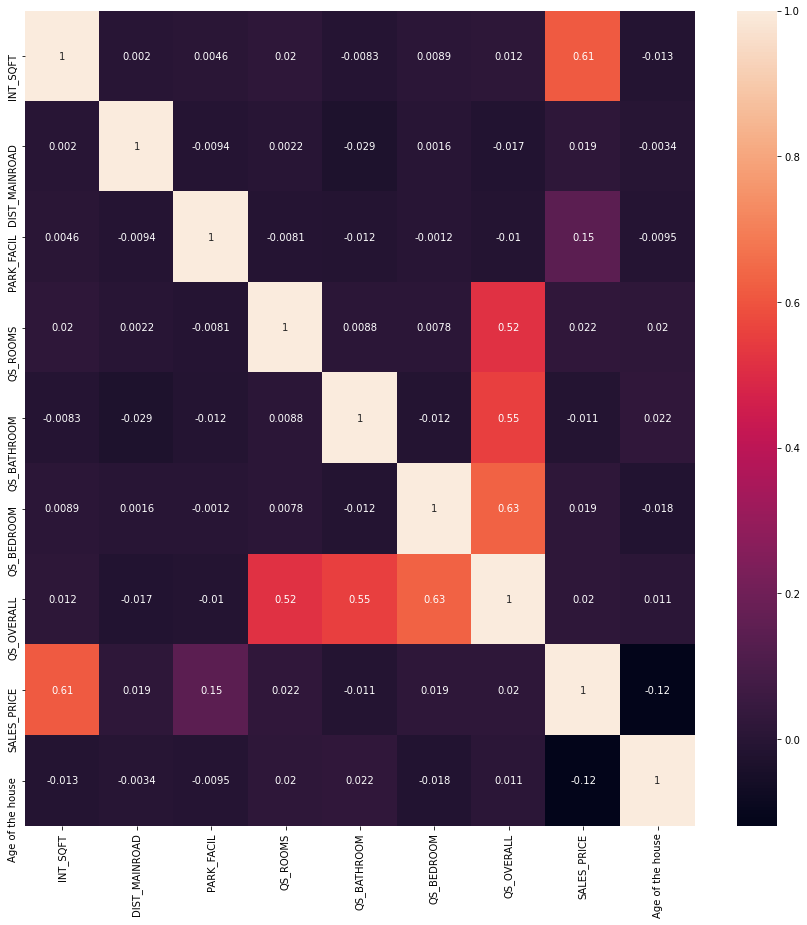

In [128]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

df.head()

# Area vs Salesprice

Text(0.5, 1.0, 'No of houses for each area')

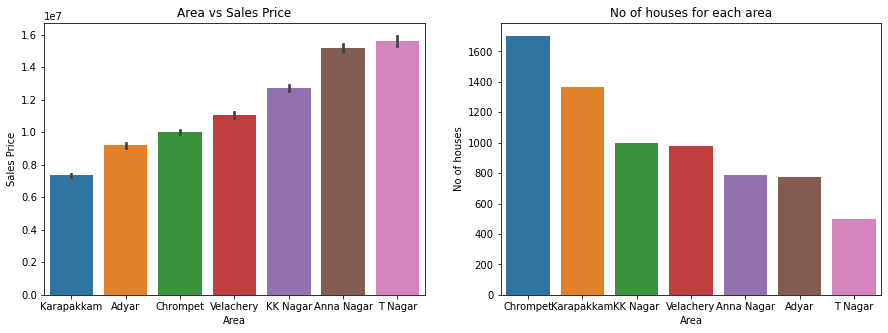

In [129]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=df,x='AREA',y='SALES_PRICE',order = df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.xlabel("Area")
plt.ylabel("Sales Price")
plt.title("Area vs Sales Price")

plt.subplot(1,2,2)
sns.countplot(data=df,x='AREA',order=df['AREA'].value_counts().index)

plt.xlabel("Area")
plt.ylabel("No of houses")
plt.title("No of houses for each area")

1) There is a clear linear relationship between Area and Sales Price

2)Since there is a linear relationship- we will do label encoding 

Here T Nagar has the highest sales price

In [130]:
df['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [131]:
df['AREA']=df['AREA'].map({'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6})  #label encoding the data

# SALE_COND VS SALES_PRICE

Text(0.5, 1.0, 'Sale Condition')

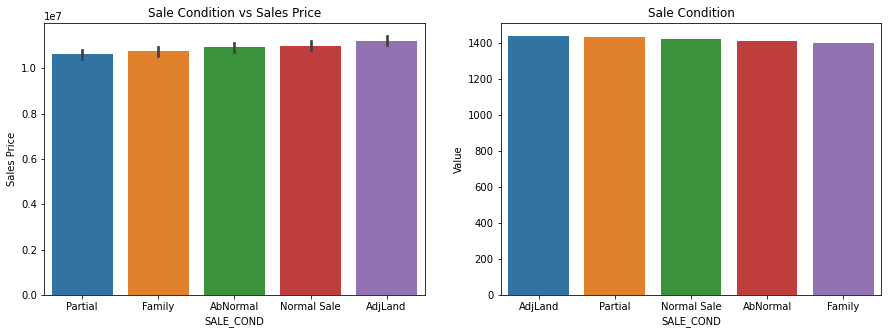

In [132]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=df,x='SALE_COND',y='SALES_PRICE',order = df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.xlabel("SALE_COND")
plt.ylabel("Sales Price")
plt.title("Sale Condition vs Sales Price")

plt.subplot(1,2,2)
sns.countplot(data=df,x='SALE_COND',order=df['SALE_COND'].value_counts().index)

plt.xlabel("SALE_COND")
plt.ylabel("Value")
plt.title("Sale Condition")

1) There is a very minute(negligable) relationship between Sale_cond and Sales_price, hence decide to drop it

# PARK_FACIL VS SALES_PRICE

Text(0.5, 1.0, 'Parking Facility')

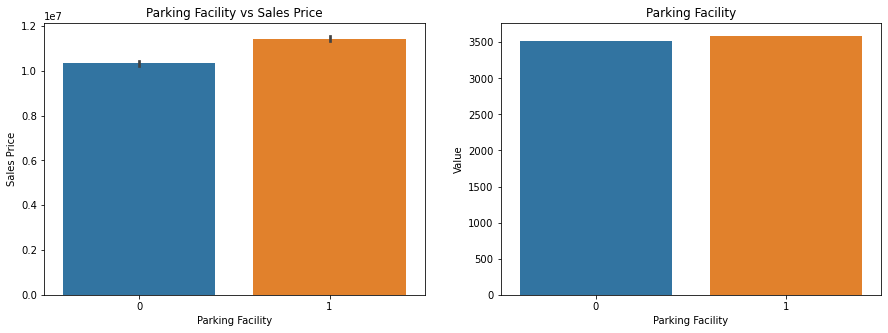

In [133]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=df,x='PARK_FACIL',y='SALES_PRICE')
plt.xlabel("Parking Facility")
plt.ylabel("Sales Price")
plt.title("Parking Facility vs Sales Price")

plt.subplot(1,2,2)
sns.countplot(data=df,x='PARK_FACIL')

plt.xlabel("Parking Facility")
plt.ylabel("Value")
plt.title("Parking Facility")

Properties with parking Facility has more sales Price, since it is binary categorical variable , we will do label encoding

# BUILDTYPE VS SALES_PRICE

Text(0.5, 1.0, 'Building Type')

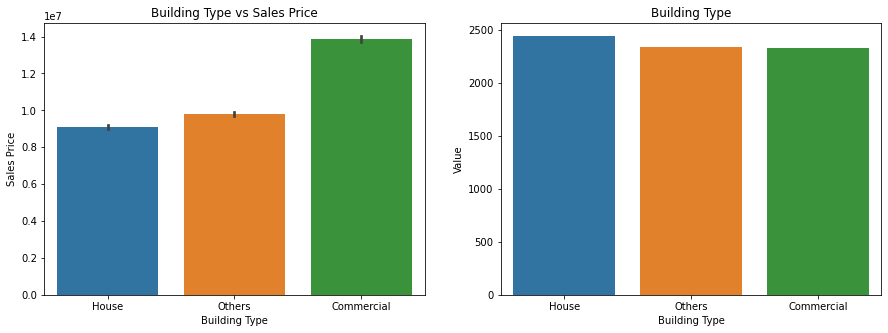

In [134]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=df,x='BUILDTYPE',y='SALES_PRICE',order = df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.xlabel("Building Type")
plt.ylabel("Sales Price")
plt.title("Building Type vs Sales Price")

plt.subplot(1,2,2)
sns.countplot(data=df,x='BUILDTYPE',order=df['BUILDTYPE'].value_counts().index)

plt.xlabel("Building Type")
plt.ylabel("Value")
plt.title("Building Type")

Here we dont have a linear relationship, there is a huge drop from Commercial to Others

Will do One HOT Encoding as there is no linear relationship.

The Sales Price for Commercial buildings is high which aligns with our general Knowledge

In [135]:
one_hot_encoded_data = pd.get_dummies(df['BUILDTYPE'], columns = ['Commercial', 'Others','House'])
print(one_hot_encoded_data)
df

      Commercial  House  Others
0              1      0       0
1              1      0       0
2              1      0       0
3              0      0       1
4              0      0       1
...          ...    ...     ...
7104           0      0       1
7105           0      0       1
7106           0      1       0
7107           1      0       0
7108           0      0       1

[7109 rows x 3 columns]


,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Age of the house
0,0,1004,2011-04-05,131,1.0,1.0,3,AbNormal,1,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,43.89
1,5,1986,2006-12-19,26,2.0,1.0,5,AbNormal,0,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,10.99
2,1,909,2012-04-02,70,1.0,1.0,3,AbNormal,1,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,19.58
3,3,1855,2010-03-13,14,3.0,2.0,5,Family,0,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,21.99
4,0,1226,2009-05-10,84,1.0,1.0,3,AbNormal,1,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,29.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,2011-03-01,51,1.0,1.0,2,AdjLand,0,1962-01-15,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000,49.12
7105,3,1897,2004-08-04,52,3.0,2.0,5,Family,1,1995-11-04,Others,NoSewr,No Access,RH,3.6,4.5,3.3,3.920,10818480,8.75
7106,3,1614,2006-08-25,152,2.0,1.0,4,Normal Sale,0,1978-01-09,House,NoSewr,Gravel,I,4.3,4.2,2.9,3.840,8351410,28.62
7107,0,787,2009-03-08,40,1.0,1.0,2,Partial,1,1977-11-08,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000,31.33


In [136]:
df=df.join(one_hot_encoded_data)

In [137]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Age of the house,Commercial,House,Others
0,0,1004,2011-04-05,131,1.0,1.0,3,AbNormal,1,1967-05-15,...,A,4.0,3.9,4.9,4.330,7600000,43.89,1,0,0
1,5,1986,2006-12-19,26,2.0,1.0,5,AbNormal,0,1995-12-22,...,RH,4.9,4.2,2.5,3.765,21717770,10.99,1,0,0
2,1,909,2012-04-02,70,1.0,1.0,3,AbNormal,1,1992-09-02,...,RL,4.1,3.8,2.2,3.090,13159200,19.58,1,0,0
3,3,1855,2010-03-13,14,3.0,2.0,5,Family,0,1988-03-18,...,I,4.7,3.9,3.6,4.010,9630290,21.99,0,0,1
4,0,1226,2009-05-10,84,1.0,1.0,3,AbNormal,1,1979-10-13,...,C,3.0,2.5,4.1,3.290,7406250,29.57,0,0,1


# UTILITY_AVAIL VS SALES_PRICE

Text(0.5, 1.0, 'Available Utilities')

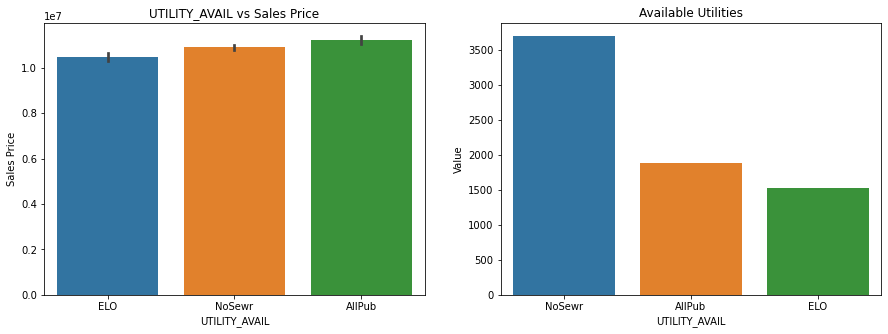

In [138]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=df,x='UTILITY_AVAIL',y='SALES_PRICE',order = df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.xlabel("UTILITY_AVAIL")
plt.ylabel("Sales Price")
plt.title("UTILITY_AVAIL vs Sales Price")

plt.subplot(1,2,2)
sns.countplot(data=df,x='UTILITY_AVAIL',order=df['UTILITY_AVAIL'].value_counts().index)

plt.xlabel("UTILITY_AVAIL")
plt.ylabel("Value")
plt.title("Available Utilities")

There is a clear Linear relationship between Utility Aval and SalesPrice, We will do label encoding

Building with All Pubs have high sales price

In [139]:
df['UTILITY_AVAIL'].value_counts()


NoSewr    3700
AllPub    1887
ELO       1522
Name: UTILITY_AVAIL, dtype: int64

In [140]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].map({'ELO':0,'NoSewr':1,'AllPub':2})

# STREET VS SALES_PRICE

Text(0.5, 1.0, 'Streets')

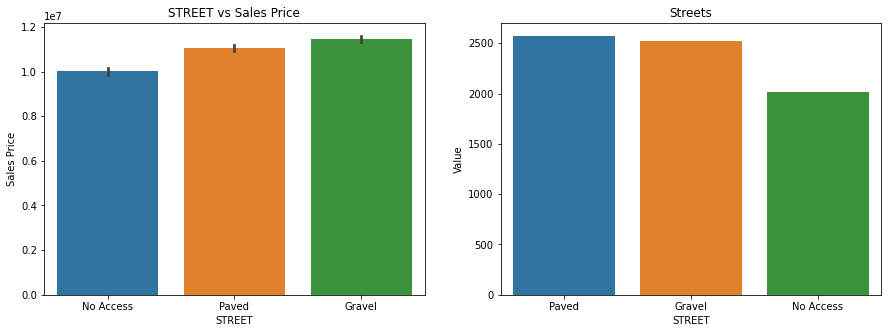

In [141]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=df,x='STREET',y='SALES_PRICE',order = df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.xlabel("STREET")
plt.ylabel("Sales Price")
plt.title("STREET vs Sales Price")

plt.subplot(1,2,2)
sns.countplot(data=df,x='STREET',order=df['STREET'].value_counts().index)

plt.xlabel("STREET")
plt.ylabel("Value")
plt.title("Streets")

There a linear relatioship and we will do label encoding

Gravel streets have more selling price

In [142]:
df['STREET'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [143]:
df['STREET']=df['STREET'].map({'No Access':0,'Paved':1,'Gravel':2})

# MZZONE vs SALES_PRICE

Text(0.5, 1.0, 'MZZONE')

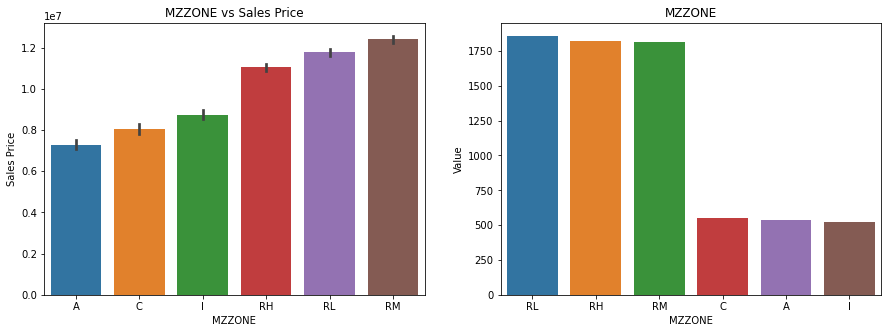

In [144]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=df,x='MZZONE',y='SALES_PRICE',order = df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.xlabel("MZZONE")
plt.ylabel("Sales Price")
plt.title("MZZONE vs Sales Price")

plt.subplot(1,2,2)
sns.countplot(data=df,x='MZZONE',order=df['MZZONE'].value_counts().index)

plt.xlabel("MZZONE")
plt.ylabel("Value")
plt.title("MZZONE")

There is a linear relationship and A,C,I and RH,RL,RM are following one pattern, so while giving label encoding we will jump one value

In [145]:
df['MZZONE'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [146]:
df['MZZONE']=df['MZZONE'].map({'A':0,'C':1,'I':2,'RH':4,'RL':5,'RM':6})

# INT_SQFT	 vs Sales_Price

Text(0.5, 1.0, 'INT_SQFT vs Sales_Price')

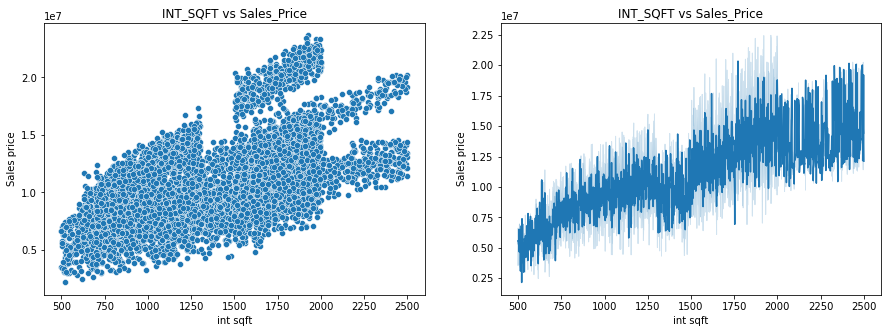

In [147]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df,x='INT_SQFT',y='SALES_PRICE')
plt.xlabel("int sqft")
plt.ylabel("Sales price")
plt.title("INT_SQFT vs Sales_Price")

plt.subplot(1,2,2)
sns.lineplot(data=df,x='INT_SQFT',y='SALES_PRICE')
plt.xlabel("int sqft")
plt.ylabel("Sales price")
plt.title("INT_SQFT vs Sales_Price")


In [148]:
df[['INT_SQFT','SALES_PRICE']].corr()

,INT_SQFT,SALES_PRICE
INT_SQFT,1.000000,0.612125
SALES_PRICE,0.612125,1.000000


There is a clear relationship between sales price and Intsqft. As the sqft increases sales price is also increasing.


# DIST_MAINROAD vs Sales_Price

Text(0.5, 1.0, 'DIST_MAINROAD vs Sales_Price')

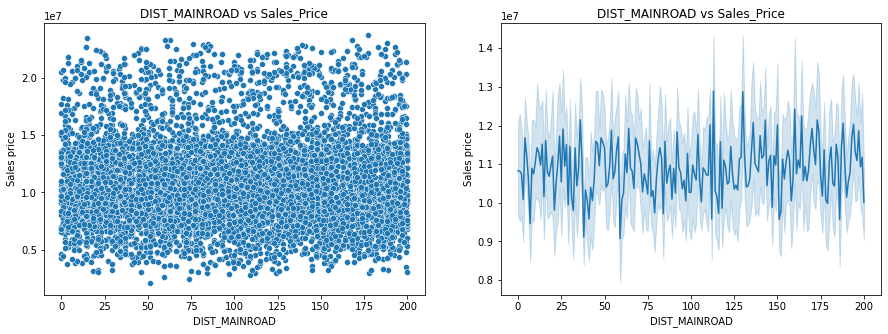

In [149]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df,x='DIST_MAINROAD',y='SALES_PRICE')
plt.xlabel("DIST_MAINROAD")
plt.ylabel("Sales price")
plt.title("DIST_MAINROAD vs Sales_Price")

plt.subplot(1,2,2)
sns.lineplot(data=df,x='DIST_MAINROAD',y='SALES_PRICE')
plt.xlabel("DIST_MAINROAD")
plt.ylabel("Sales price")
plt.title("DIST_MAINROAD vs Sales_Price")

Couldnt see any  relationship from graph 

Text(0.5, 1.0, 'DIST_MAINROAD vs Sales_Price')

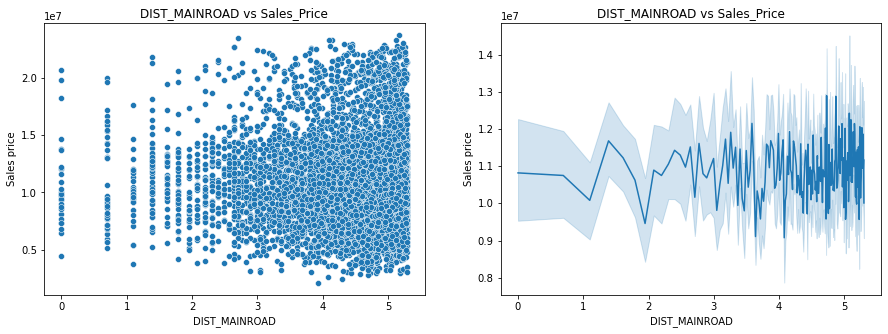

In [150]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df,x=np.log(df['DIST_MAINROAD']),y='SALES_PRICE')
plt.xlabel("DIST_MAINROAD")
plt.ylabel("Sales price")
plt.title("DIST_MAINROAD vs Sales_Price")

plt.subplot(1,2,2)
sns.lineplot(data=df,x=np.log(df['DIST_MAINROAD']),y='SALES_PRICE')
plt.xlabel("DIST_MAINROAD")
plt.ylabel("Sales price")
plt.title("DIST_MAINROAD vs Sales_Price")

Tried all the transformations available and there is no relationship found, decided to drop DIST_MAINROAD


In [151]:
np.power(df['DIST_MAINROAD'],3).corr(df['SALES_PRICE'])

0.02252756855428494

In [152]:
np.power(df['DIST_MAINROAD'],0.5).corr(df['SALES_PRICE'])

0.015580224393633765

# N_BEDROOM	 VS SALES_PRICE

In [153]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Age of the house,Commercial,House,Others
0,0,1004,2011-04-05,131,1.0,1.0,3,AbNormal,1,1967-05-15,...,0,4.0,3.9,4.9,4.330,7600000,43.89,1,0,0
1,5,1986,2006-12-19,26,2.0,1.0,5,AbNormal,0,1995-12-22,...,4,4.9,4.2,2.5,3.765,21717770,10.99,1,0,0
2,1,909,2012-04-02,70,1.0,1.0,3,AbNormal,1,1992-09-02,...,5,4.1,3.8,2.2,3.090,13159200,19.58,1,0,0
3,3,1855,2010-03-13,14,3.0,2.0,5,Family,0,1988-03-18,...,2,4.7,3.9,3.6,4.010,9630290,21.99,0,0,1
4,0,1226,2009-05-10,84,1.0,1.0,3,AbNormal,1,1979-10-13,...,1,3.0,2.5,4.1,3.290,7406250,29.57,0,0,1


Text(0.5, 1.0, 'N_BEDROOM')

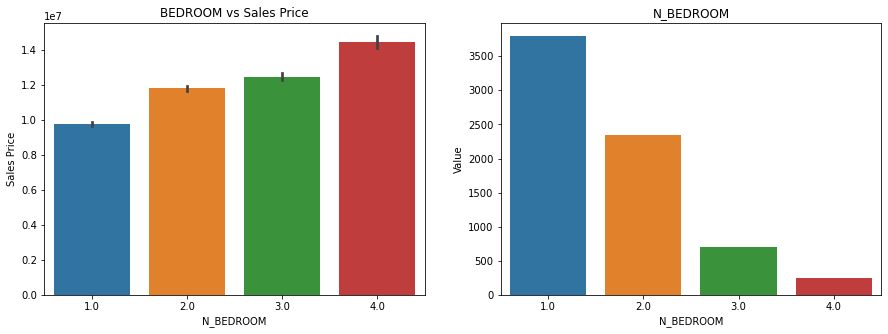

In [154]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=df,x='N_BEDROOM',y='SALES_PRICE',order = df.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BEDROOM'])
plt.xlabel("N_BEDROOM")
plt.ylabel("Sales Price")
plt.title("BEDROOM vs Sales Price")

plt.subplot(1,2,2)
sns.countplot(data=df,x='N_BEDROOM',order=df['N_BEDROOM'].value_counts().index)

plt.xlabel("N_BEDROOM")
plt.ylabel("Value")
plt.title("N_BEDROOM")

There is a clear linear relationship and it is already encoded

Houses with more bed rooms has more sales_price

# N_BATHROOM VS SALES_PRICE

Text(0.5, 1.0, 'N_BATHROOM')

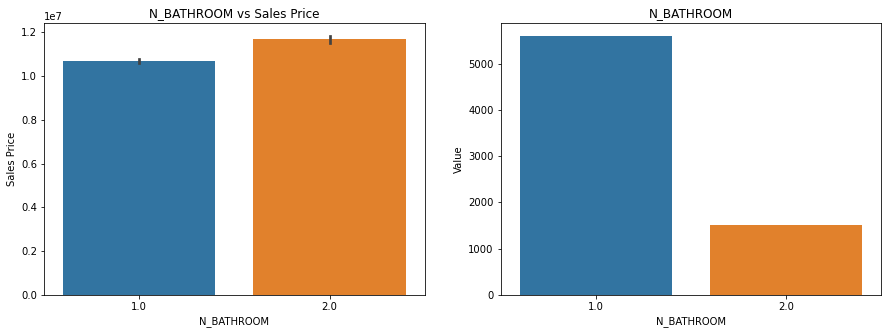

In [155]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=df,x='N_BATHROOM',y='SALES_PRICE',order = df.groupby('N_BATHROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BATHROOM'])
plt.xlabel("N_BATHROOM")
plt.ylabel("Sales Price")
plt.title("N_BATHROOM vs Sales Price")

plt.subplot(1,2,2)
sns.countplot(data=df,x='N_BATHROOM',order=df['N_BATHROOM'].value_counts().index)

plt.xlabel("N_BATHROOM")
plt.ylabel("Value")
plt.title("N_BATHROOM")

In [156]:
df['N_BATHROOM'].value_counts()

1.0    5594
2.0    1515
Name: N_BATHROOM, dtype: int64

There is a linear relationship and houses with more bathrooms have high selling price


# N_ROOM VS SELLING PRICE

Text(0.5, 1.0, 'N_ROOM')

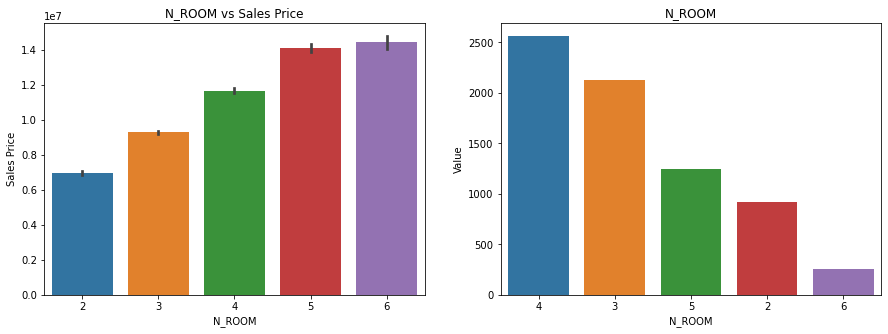

In [157]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=df,x='N_ROOM',y='SALES_PRICE',order = df.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM'])
plt.xlabel("N_ROOM")
plt.ylabel("Sales Price")
plt.title("N_ROOM vs Sales Price")

plt.subplot(1,2,2)
sns.countplot(data=df,x='N_ROOM',order=df['N_ROOM'].value_counts().index)

plt.xlabel("N_ROOM")
plt.ylabel("Value")
plt.title("N_ROOM")


Clear Linear relationship and houses with more rooms have more selling price

# QS vs SALES_PRICE

Text(0.5, 1.0, 'QS_OVERALL vs Sales_Price')

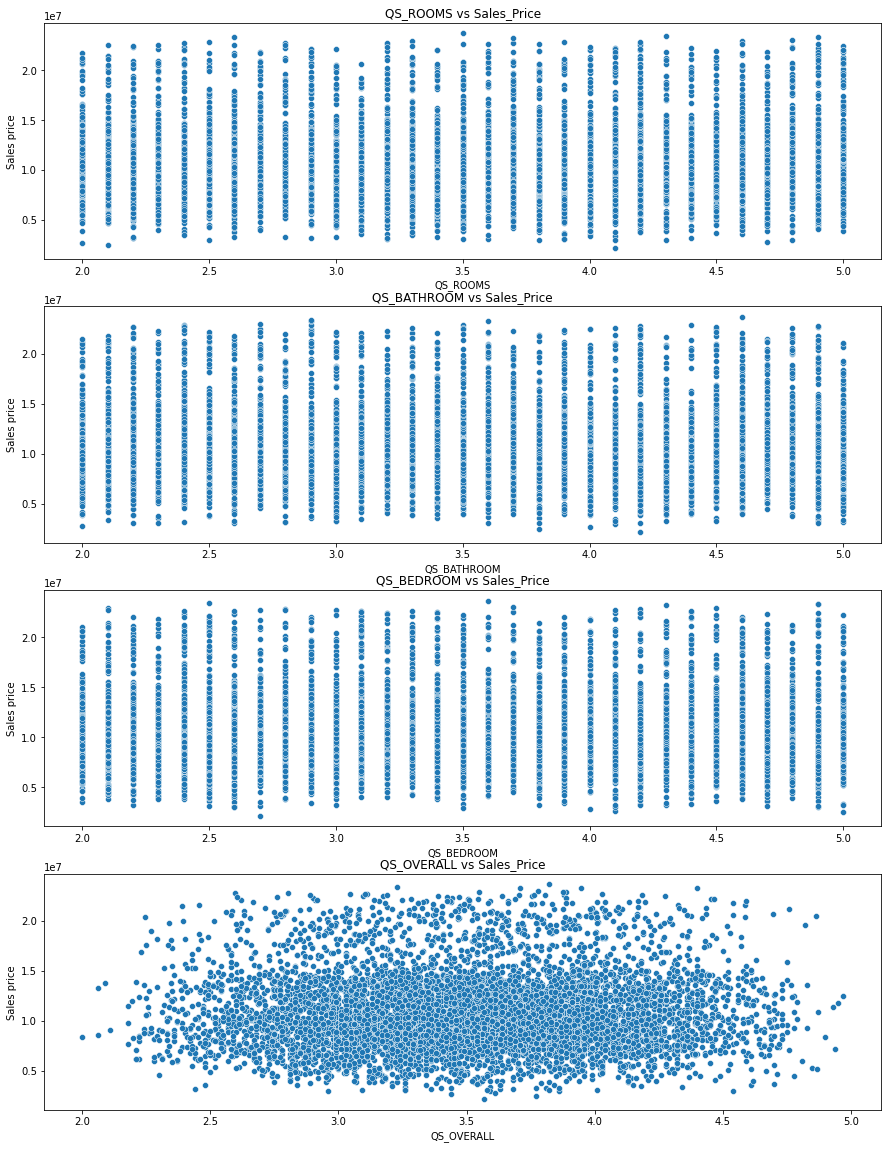

In [158]:
plt.figure(figsize=(15,20))
plt.subplot(4,1,1)
sns.scatterplot(data=df,x='QS_ROOMS',y='SALES_PRICE')
plt.xlabel("QS_ROOMS")
plt.ylabel("Sales price")
plt.title("QS_ROOMS vs Sales_Price")

plt.subplot(4,1,2)
sns.scatterplot(data=df,x='QS_BATHROOM',y='SALES_PRICE')
plt.xlabel("QS_BATHROOM")
plt.ylabel("Sales price")
plt.title("QS_BATHROOM vs Sales_Price")

plt.subplot(4,1,3)
sns.scatterplot(data=df,x='QS_BEDROOM',y='SALES_PRICE')
plt.xlabel("QS_BEDROOM")
plt.ylabel("Sales price")
plt.title("QS_BEDROOM vs Sales_Price")

plt.subplot(4,1,4)
sns.scatterplot(data=df,x='QS_OVERALL',y='SALES_PRICE')
plt.xlabel("QS_OVERALL")
plt.ylabel("Sales price")
plt.title("QS_OVERALL vs Sales_Price")

Couldnt find any relationship between QS columns and Sales price
Hence decided to drop all the QS coloumns

In [159]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE',
       'Age of the house', 'Commercial', 'House', 'Others'],
      dtype='object')

In [160]:
X= df[['AREA', 'INT_SQFT', 'N_BEDROOM','N_BATHROOM', 'N_ROOM', 'PARK_FACIL','UTILITY_AVAIL', 'STREET', 'MZZONE', 'Commercial', 'House', 'Others']].values
y= df['SALES_PRICE'].values

Took only the required coloumns, Havent considered 
1)DIST_MAINROAD as it doesnt show any relatioship with sales price
2) Sales_Cond as it doesnt have any linear relationship
3) same goes with masked data , Age of the house


# Splitting the data

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scaling the data

In [162]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 
X_train_scaled

array([[ 0.78676154,  2.06795583,  2.95701614, ...,  1.41851408,
        -0.72292726, -0.69353413],
       [-0.29503558, -1.06706685, -0.79779574, ..., -0.70496304,
         1.38326503, -0.69353413],
       [ 0.78676154,  1.74658321,  1.70541218, ..., -0.70496304,
        -0.72292726,  1.44189011],
       ...,
       [ 0.78676154,  1.54326584,  1.70541218, ..., -0.70496304,
         1.38326503, -0.69353413],
       [ 0.24586298,  0.81525848,  0.45380822, ...,  1.41851408,
        -0.72292726, -0.69353413],
       [ 0.78676154,  0.13753391,  0.45380822, ...,  1.41851408,
        -0.72292726, -0.69353413]])

# Model Building- Linear Regression

In [163]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [164]:
regressor.intercept_  # C value

10925361.34253561

In [165]:
regressor.coef_   # coefficients

array([ 1079142.60594535,   608978.69548757, -1248985.48114483,
         126887.55699391,  1769079.14956204,   529643.17981288,
          50739.80748268,   407812.39937116,   890177.14821822,
        1355478.91574754,  -851067.65357166,  -500225.4527446 ])

In [166]:
y_pred = regressor.predict(X_test_scaled) #predicting X_test_scaled values

In [167]:
y_pred

array([14117789.98097204, 12924854.4328806 , 19065977.91464835, ...,
       13650914.62498743, 15935586.33424057,  8105802.66694805])

In [168]:
ab = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
ab    # Compairing predicted and original values

,Actual,Predicted
0,13376150,1.411779e+07
1,12857440,1.292485e+07
2,19124310,1.906598e+07
3,4905000,3.979045e+06
4,13534450,1.347910e+07
...,...,...
1417,9987005,9.909000e+06
1418,5821000,5.902258e+06
1419,13364730,1.365091e+07
1420,17115030,1.593559e+07


In [169]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))  # Evaluation metric R2

R2- SCORE: 0.9172241539046856


Our Model gave a R2 score of 0.917 , which indicates it is a really good model

# Decision Tree Regression Model

In [170]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor()

# Fit dt to the training set
dt.fit(X_train_scaled, y_train)
dt.predict(X_test_scaled)

array([13840875., 12459280., 19627640., ..., 13026890., 17991120.,
        8410150.])

In [171]:
y_pred = dt.predict(X_test_scaled) #predicting X_test_scaled values

In [172]:
ab = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
ab    # Compairing predicted and original values

,Actual,Predicted
0,13376150,13840875.0
1,12857440,12459280.0
2,19124310,19627640.0
3,4905000,4806125.0
4,13534450,14239850.0
...,...,...
1417,9987005,10283575.0
1418,5821000,6016875.0
1419,13364730,13026890.0
1420,17115030,17991120.0


In [173]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9754974494409347


In [174]:
from sklearn.model_selection import cross_val_score
for depth in [1,2,3,4,5,6,7,8,9,10,20,30,40,60]:
    dt= DecisionTreeRegressor(max_depth=depth) # will tell the DT to not grow past the given threhsold
    valAccuracy = cross_val_score(dt, X_train_scaled, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
    print("Depth  : ", depth, " Cross val score : " ,np.mean(valAccuracy))
  

Depth  :  1  Cross val score :  0.36162036447194124
Depth  :  2  Cross val score :  0.6805303832546072
Depth  :  3  Cross val score :  0.8031246307797796
Depth  :  4  Cross val score :  0.8828961946559559
Depth  :  5  Cross val score :  0.9150651865194004
Depth  :  6  Cross val score :  0.9361760740464853
Depth  :  7  Cross val score :  0.9509764114207926
Depth  :  8  Cross val score :  0.9607064957453769
Depth  :  9  Cross val score :  0.9689754583072523
Depth  :  10  Cross val score :  0.9735185803854417
Depth  :  20  Cross val score :  0.9751214928809411
Depth  :  30  Cross val score :  0.974889533444624
Depth  :  40  Cross val score :  0.9748728755074962
Depth  :  60  Cross val score :  0.9752449072671675


Best Cross Val score is for depth value 20 -  0.97523

In [175]:
dt = DecisionTreeRegressor(max_depth=20)

# Fit dt to the training set
dt.fit(X_train_scaled, y_train)
dt.predict(X_test_scaled)

array([13840875., 12459280., 19627640., ..., 13026890., 17787740.,
        8410150.])

In [176]:
y_pred = dt.predict(X_test_scaled) #predicting X_test_scaled values

In [177]:
ab = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
ab    # Compairing predicted and original values

,Actual,Predicted
0,13376150,13840875.0
1,12857440,12459280.0
2,19124310,19627640.0
3,4905000,4806125.0
4,13534450,14239850.0
...,...,...
1417,9987005,10283575.0
1418,5821000,6016875.0
1419,13364730,13026890.0
1420,17115030,17787740.0


 MAX DEPTH - 20  Cross val score :  0.9752358337737095

# KNN REGRESSION MODEL

In [179]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
for k in range(2,20):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    valAccuracy = cross_val_score(dt, X_train_scaled, y_train, cv=10)
    print("K value : ", k,  " Cross Val score : " ,np.mean(valAccuracy))
    
      

K value :  2  Cross Val score :  0.9749151509884884
K value :  3  Cross Val score :  0.9746564666516633
K value :  4  Cross Val score :  0.9749013444589518
K value :  5  Cross Val score :  0.9752510503724652
K value :  6  Cross Val score :  0.9749500658200991
K value :  7  Cross Val score :  0.9746752118311688
K value :  8  Cross Val score :  0.9751021907999192
K value :  9  Cross Val score :  0.9750133576529951
K value :  10  Cross Val score :  0.9751483307686355
K value :  11  Cross Val score :  0.9750825234705095
K value :  12  Cross Val score :  0.9751339735907223
K value :  13  Cross Val score :  0.9750388084206953
K value :  14  Cross Val score :  0.9752283874355866
K value :  15  Cross Val score :  0.9749728004226498
K value :  16  Cross Val score :  0.9748427231339949
K value :  17  Cross Val score :  0.975168797876243
K value :  18  Cross Val score :  0.975204905227843
K value :  19  Cross Val score :  0.9748871116235337


K value 5: Cross val Score :  Cross Val score :  0.9752510503724652

In [185]:
knn = KNeighborsRegressor(n_neighbors=5)

# Fit knn to the training set
knn.fit(X_train_scaled, y_train)
knn.predict(X_test_scaled)

array([13731630., 12324888., 19954114., ..., 13616846., 17998680.,
        8057360.])

In [186]:
y_pred = knn.predict(X_test_scaled) #predicting X_test_scaled values

In [187]:
ab = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
ab    # Compairing predicted and original values

,Actual,Predicted
0,13376150,13731630.0
1,12857440,12324888.0
2,19124310,19954114.0
3,4905000,5002986.0
4,13534450,13533590.0
...,...,...
1417,9987005,7612837.0
1418,5821000,7308776.0
1419,13364730,13616846.0
1420,17115030,17998680.0


# RandomForest

In [183]:
from sklearn.ensemble import  RandomForestRegressor
for depth in range(2,20):
    rf= RandomForestRegressor(max_depth=depth) # will tell the DT to not grow past the given threhsold
    valAccuracy = cross_val_score(rf, X_train_scaled, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
    print("Depth  : ", depth, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  2  Cross val score :  0.6804739252049823
Depth  :  3  Cross val score :  0.812885146852986
Depth  :  4  Cross val score :  0.8928766459501052
Depth  :  5  Cross val score :  0.9290159794161159
Depth  :  6  Cross val score :  0.9510590714182896
Depth  :  7  Cross val score :  0.9661642218372742
Depth  :  8  Cross val score :  0.9759512904235693
Depth  :  9  Cross val score :  0.9817810353306395
Depth  :  10  Cross val score :  0.984814599557476
Depth  :  11  Cross val score :  0.986257603923168
Depth  :  12  Cross val score :  0.9868463682493636
Depth  :  13  Cross val score :  0.9869683410814549
Depth  :  14  Cross val score :  0.9870818273889581
Depth  :  15  Cross val score :  0.9870253308405124
Depth  :  16  Cross val score :  0.9869615183329922
Depth  :  17  Cross val score :  0.9870317582683645
Depth  :  18  Cross val score :  0.9869890439913899
Depth  :  19  Cross val score :  0.9870652867050346


Depth  :  14  Cross val score :  0.9870818273889581

In [188]:
rf = RandomForestRegressor(max_depth=14)

# Fit dt to the training set
rf.fit(X_train_scaled, y_train)
rf.predict(X_test_scaled)

array([13785185.56661255, 12450795.8       , 19541686.3       , ...,
       13760906.03395727, 17855036.7       ,  8324592.45937781])

In [189]:
y_pred = rf.predict(X_test_scaled) #predicting X_test_scaled values

In [190]:
ab = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
ab    # Compairing predicted and original values

,Actual,Predicted
0,13376150,1.378519e+07
1,12857440,1.245080e+07
2,19124310,1.954169e+07
3,4905000,4.453618e+06
4,13534450,1.419426e+07
...,...,...
1417,9987005,9.668159e+06
1418,5821000,5.883366e+06
1419,13364730,1.376091e+07
1420,17115030,1.785504e+07


For all the models we got highest cross validation score for Random forest Regressor -  0.98708